In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [2]:
def grid_maker(): 
    grid = []
    for x in range(0, 5):
        grid.append([])
        for y in range (0, 5):
            grid[x].append(bool(random.getrandbits(1)))
    return grid

In [3]:
grid_maker()

[[False, True, False, False, True],
 [True, True, True, True, False],
 [True, True, False, False, True],
 [False, False, True, False, False],
 [True, True, False, True, False]]

In [4]:
false_grid = [[False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False]]

In [5]:
true_grid = [[True, True, True, True, True],
 [True, True, True, True, True],
 [True, True, True, True, True],
 [True, True, True, True, True],
 [True, True, True, True, True]]

In [6]:
def mapper(n, isy=False):
    if (isy):
        n = 4-n
    if (n==0):
        return -1
    elif (n==1):
        return -0.5
    elif (n==2):
        return 0
    elif (n==3):
        return 0.5
    elif (n==4):
        return 1

In [7]:
def get_slopes():
    this_grid = grid_maker()
#     this_grid = true_grid
    xs = []
    ys = []
    for y in range(4, -1, -1):
        for x in range(0, 5): 
            if (this_grid[y][x] == True):
                xs.append([1, mapper(x)])
                ys.append(mapper(y, True))
    # OLS: 
    X = np.array(xs)
    y = np.array(ys)
#     if (len(y) > 0):
    return(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), np.dot(X.transpose(), y))[1])

In [10]:
get_slopes()

0.06060606060606061

In [25]:
slopes = [] # 10000000
for i in range(0, 10000000):
    try:
        slopes.append(get_slopes())
    except:
        pass

In [26]:
len(slopes)

9999952

(array([5.000000e+00, 2.200000e+01, 1.650000e+02, 1.628900e+04,
        4.890432e+06, 5.077310e+06, 1.555900e+04, 1.470000e+02,
        2.000000e+01, 3.000000e+00]),
 array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 <a list of 10 Patch objects>)

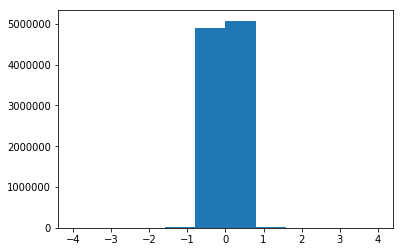

In [27]:
plt.hist(slopes)

In [28]:
np.mean(slopes) # 2.0581701525749853e-05 @ 10000000

4.184803950596086e-05

In [29]:
np.std(slopes) # 0.24007778194029583 @ 10000000

0.23997315376214298

In [33]:
dist_mean = np.mean(slopes)
dist_std = np.std(slopes)
to_uniform = []
z_scores = []
for slope in slopes: 
    Z = (slope - dist_mean) / dist_std
    z_scores.append(Z)
    area_under_z = st.norm.cdf(Z)
    to_uniform.append(area_under_z)

(array([ 928040.,  932314.,  999334., 1062184., 1171735.,  983175.,
        1062568.,  999241.,  931093.,  930268.]),
 array([1.10667937e-62, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

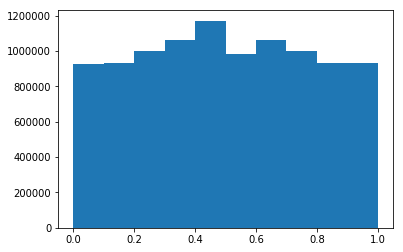

In [41]:
plt.hist(to_uniform)

(array([3.699000e+03, 2.741600e+04, 2.163940e+05, 1.220743e+06,
        3.624287e+06, 3.438330e+06, 1.220181e+06, 2.160230e+05,
        2.710500e+04, 3.687000e+03, 6.430000e+02]),
 array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6]),
 <a list of 11 Patch objects>)

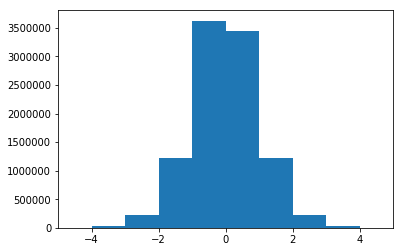

In [40]:
plt.xlim(-5, 5)
plt.hist(z_scores, bins=[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6])

not sure what this stuff is:

In [18]:
# golden = (1 + 5 ** 0.5) / 2
# uniform = []
# for slope in slopes:
#     uniform.append(slope * np.sqrt(5))

In [19]:
# print(golden)